<a href="https://colab.research.google.com/github/ayushchat1/MBA-Code/blob/main/BIA_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# =============================================================================
# STEP 1: DATA LOADING & CLEANING
# =============================================================================

# Import the pandas library, which is essential for data manipulation and analysis in Python.
import pandas as pd

# --- 1.1 Data Loading ---
# We use a try-except block to handle potential file errors gracefully.
# This attempts to read the CSV file into a pandas DataFrame.
try:
    df = pd.read_csv('/content/Case Data.csv')
    print(" Data loaded successfully.")
    print(f"The dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")
except FileNotFoundError:
    print(" Error: 'Case Data.csv' not found. Please ensure the file is in the correct directory.")
    # Exit the script if the data can't be loaded, as subsequent steps depend on it.
    exit()





 Data loaded successfully.
The dataset contains 220 rows and 11 columns.


In [ ]:
# --- 1.2 Data Inspection ---
# It's good practice to look at the first few rows to understand the data's structure.
print("\n--- First 5 Rows of the Raw Data ---")
print(df.head())

# The .info() method gives a concise summary of the DataFrame, including data types and non-null values.
print("\n--- Data Types and Non-Null Counts ---")
df.info()





--- First 5 Rows of the Raw Data ---
   Company ID      DSRI       GMI       AQI        SGI      DEPI      SGAI  \
0           1  1.624742  1.128927  7.185053   0.366211  1.381519  1.624145   
1           2  1.000000  1.606492  1.004988  13.081433  0.400000  5.198207   
2           3  1.000000  1.015607  1.241389   1.475018  1.169353  0.647671   
3           4  1.486239  1.000000  0.465535   0.672840  2.000000  0.092890   
4           5  1.000000  1.369038  0.637112   0.861346  1.454676  1.741460   

       ACCR      LEVI Manipulator  C-MANIPULATOR  
0 -0.166809  1.161082         Yes              1  
1  0.060475  0.986732         Yes              1  
2  0.036732  1.264305         Yes              1  
3  0.273434  0.680975         Yes              1  
4  0.123048  0.939047         Yes              1  

--- Data Types and Non-Null Counts ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 

In [ ]:
# --- 1.3 Data Cleaning ---
# The dataset has two columns for the target variable: 'Manipulator' (text) and 'C-MANIPULATOR' (numeric).
# We will standardize this by using a single, clear name 'target' for the numeric version.
if 'C-MANIPULATOR' in df.columns and 'Manipulator' in df.columns:
    df.rename(columns={'C-MANIPULATOR': 'target'}, inplace=True)
    df.drop(columns=['Manipulator'], inplace=True)
    print("\n Renamed 'C-MANIPULATOR' to 'target' and dropped the redundant 'Manipulator' column.")

# The 'Company ID' is just an identifier and provides no predictive information. It should be removed.
if 'Company ID' in df.columns:
    df.drop(columns=['Company ID'], inplace=True)
    print(" Dropped the non-predictive 'Company ID' column.")

# Check for any missing values across the entire dataset.
if df.isnull().sum().sum() == 0:
    print(" No missing values found in the dataset.")
else:
    print(" Warning: Missing values detected. Further handling may be required.")
    print(df.isnull().sum())

# --- 1.4 Display Cleaned Data ---
# Display the first few rows again to confirm our cleaning steps were successful.
print("\n--- First 5 Rows of the Cleaned Data ---")
print(df.head())

print("\n--- Data Cleaning Complete ---")


 Renamed 'C-MANIPULATOR' to 'target' and dropped the redundant 'Manipulator' column.
 Dropped the non-predictive 'Company ID' column.
 No missing values found in the dataset.

--- First 5 Rows of the Cleaned Data ---
       DSRI       GMI       AQI        SGI      DEPI      SGAI      ACCR  \
0  1.624742  1.128927  7.185053   0.366211  1.381519  1.624145 -0.166809   
1  1.000000  1.606492  1.004988  13.081433  0.400000  5.198207  0.060475   
2  1.000000  1.015607  1.241389   1.475018  1.169353  0.647671  0.036732   
3  1.486239  1.000000  0.465535   0.672840  2.000000  0.092890  0.273434   
4  1.000000  1.369038  0.637112   0.861346  1.454676  1.741460  0.123048   

       LEVI  target  
0  1.161082       1  
1  0.986732       1  
2  1.264305       1  
3  0.680975       1  
4  0.939047       1  

--- Data Cleaning Complete ---



 conducting Comprehensive Exploratory Data Analysis...


/tmp/ipython-input-3335464818.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df, ax=ax, palette='viridis')


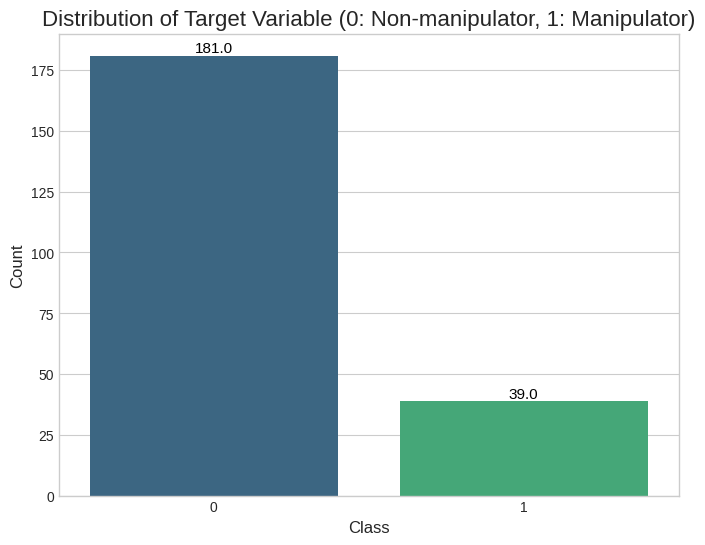

Percentage of Manipulators in the dataset: 17.73%
Insight: The visualization confirms a severe class imbalance. Standard models will likely be biased towards the majority class (Non-manipulators).


In [ ]:
# =============================================================================
# STEP 2: COMPREHENSIVE EXPLORATORY DATA ANALYSIS (EDA)
# =============================================================================
import matplotlib.pyplot as plt
import seaborn as sns
print("\n conducting Comprehensive Exploratory Data Analysis...")

# --- 2.1 Target Variable Distribution ---
# This is the most important step to visually confirm the class imbalance problem.
plt.style.use('seaborn-v0_8-whitegrid')
fig_target_dist, ax = plt.subplots(figsize=(8, 6))
sns.countplot(x='target', data=df, ax=ax, palette='viridis')
ax.set_title('Distribution of Target Variable (0: Non-manipulator, 1: Manipulator)', fontsize=16)
ax.set_xlabel('Class', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
# Annotate bars with the exact counts
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()

manipulator_percentage = (df['target'].sum() / len(df)) * 100
print(f"Percentage of Manipulators in the dataset: {manipulator_percentage:.2f}%")
print("Insight: The visualization confirms a severe class imbalance. Standard models will likely be biased towards the majority class (Non-manipulators).")




In [ ]:
# --- 2.2 Descriptive Statistics by Class ---
# We group the data by the 'target' variable and calculate descriptive statistics.
# This helps us see if the average values of the financial ratios differ between the two groups.
print("\n--- Descriptive Statistics by Class ---")
stats_by_class = df.groupby('target').describe().transpose()
print(stats_by_class)
print("\nInsight: Manipulators (target=1) on average have a much higher SGI (Sales Growth Index) and DSRI (Days Sales in Receivables Index) than non-manipulators. This aligns with financial theory that rapidly growing companies or those with inflated receivables are at higher risk.")





--- Descriptive Statistics by Class ---
target               0          1
DSRI count  181.000000  39.000000
     mean     1.160283   3.208011
     std      0.643116   6.373079
     min      0.015096   0.146341
     25%      0.887798   1.000000
...                ...        ...
LEVI min      0.506631   0.000000
     25%      0.933093   0.608520
     50%      1.008536   1.006394
     75%      1.106378   1.163933
     max      2.542952  13.058559

[64 rows x 2 columns]

Insight: Manipulators (target=1) on average have a much higher SGI (Sales Growth Index) and DSRI (Days Sales in Receivables Index) than non-manipulators. This aligns with financial theory that rapidly growing companies or those with inflated receivables are at higher risk.



--- Univariate Analysis: Distribution of Each Financial Ratio ---


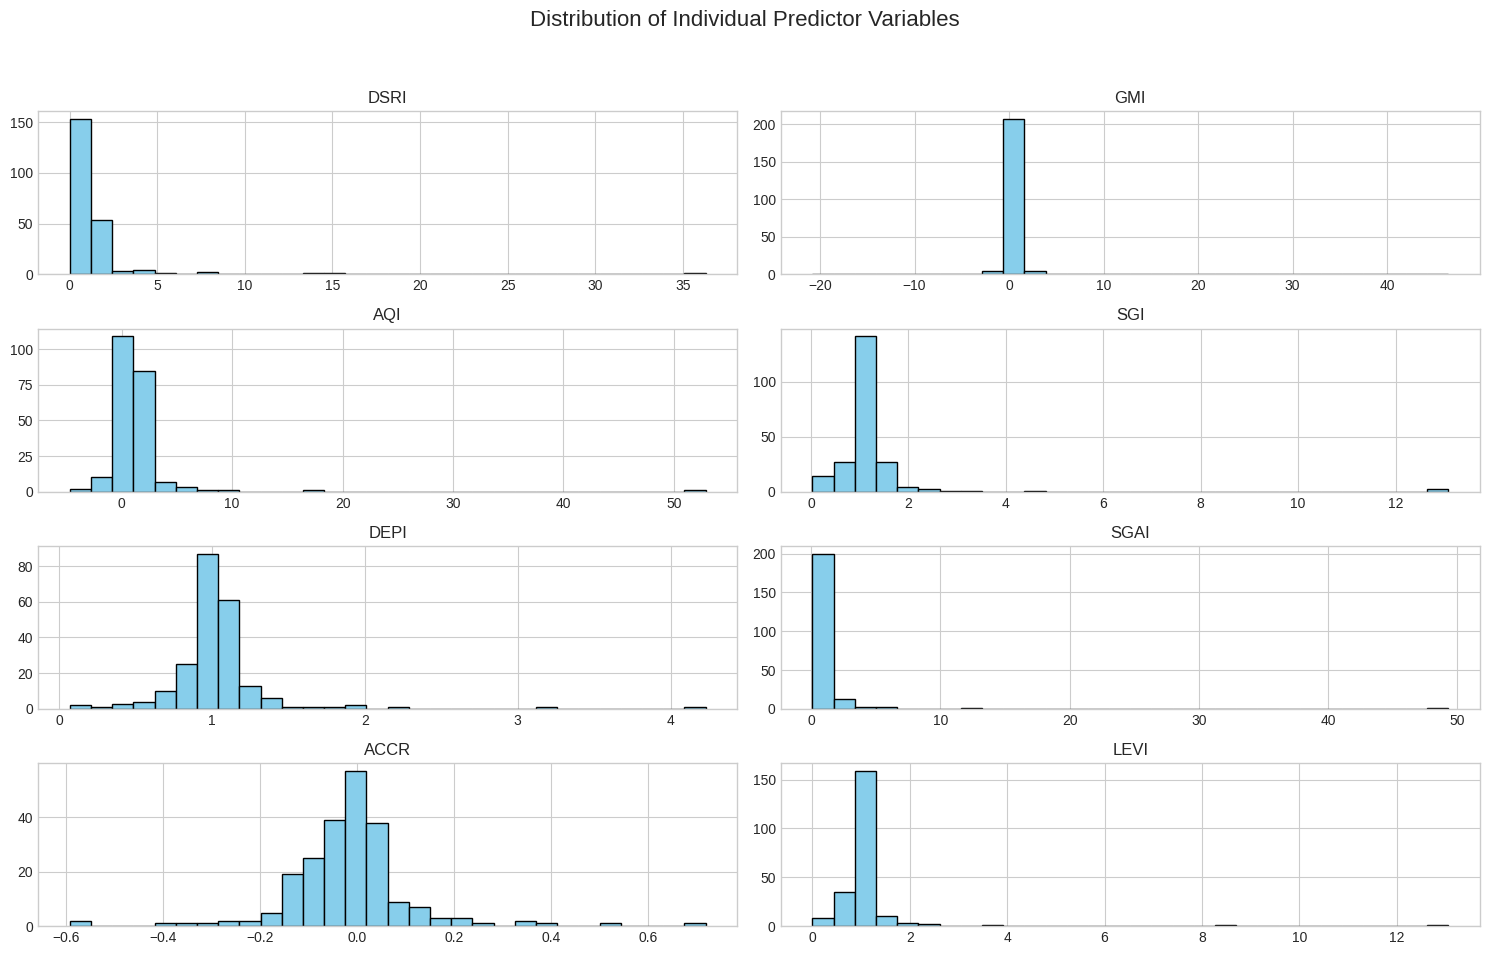


Insight: Most variables are centered around a value of 1, which is expected as they are indices comparing the current year to the previous year. However, several variables show significant right skewness (e.g., SGI, AQI), indicating the presence of outliers with very high values.


In [ ]:
# --- 2.3 Univariate Analysis (Feature Distributions) ---
# Histograms help us understand the distribution of each individual financial ratio.
print("\n--- Univariate Analysis: Distribution of Each Financial Ratio ---")
features = df.columns.drop('target')
df[features].hist(bins=30, figsize=(15, 10), layout=(4, 2), color='skyblue', edgecolor='black')
plt.suptitle('Distribution of Individual Predictor Variables', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
print("\nInsight: Most variables are centered around a value of 1, which is expected as they are indices comparing the current year to the previous year. However, several variables show significant right skewness (e.g., SGI, AQI), indicating the presence of outliers with very high values.")





--- Bivariate Analysis: Correlation Matrix of Financial Indices ---


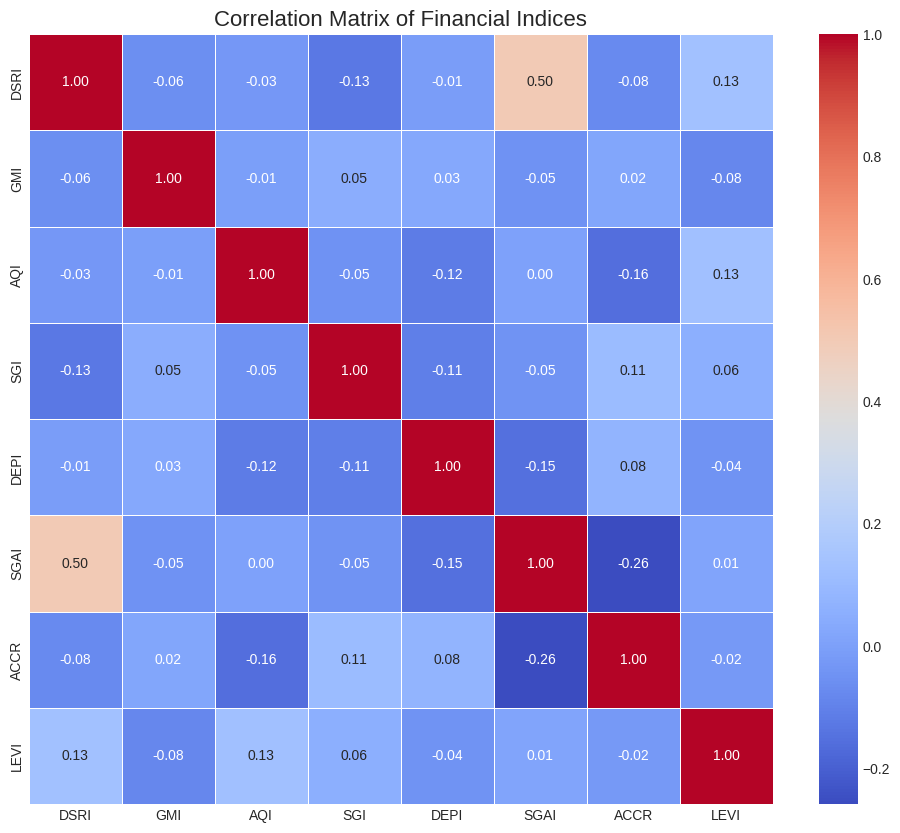


Insight: Most features have low correlation with each other, which is good as it reduces the risk of multicollinearity in linear models. The strongest positive correlation is between DSRI and SGAI, which makes sense as both relate to sales and administrative activities.

--- Bivariate Analysis: Pair Plot of Features ---


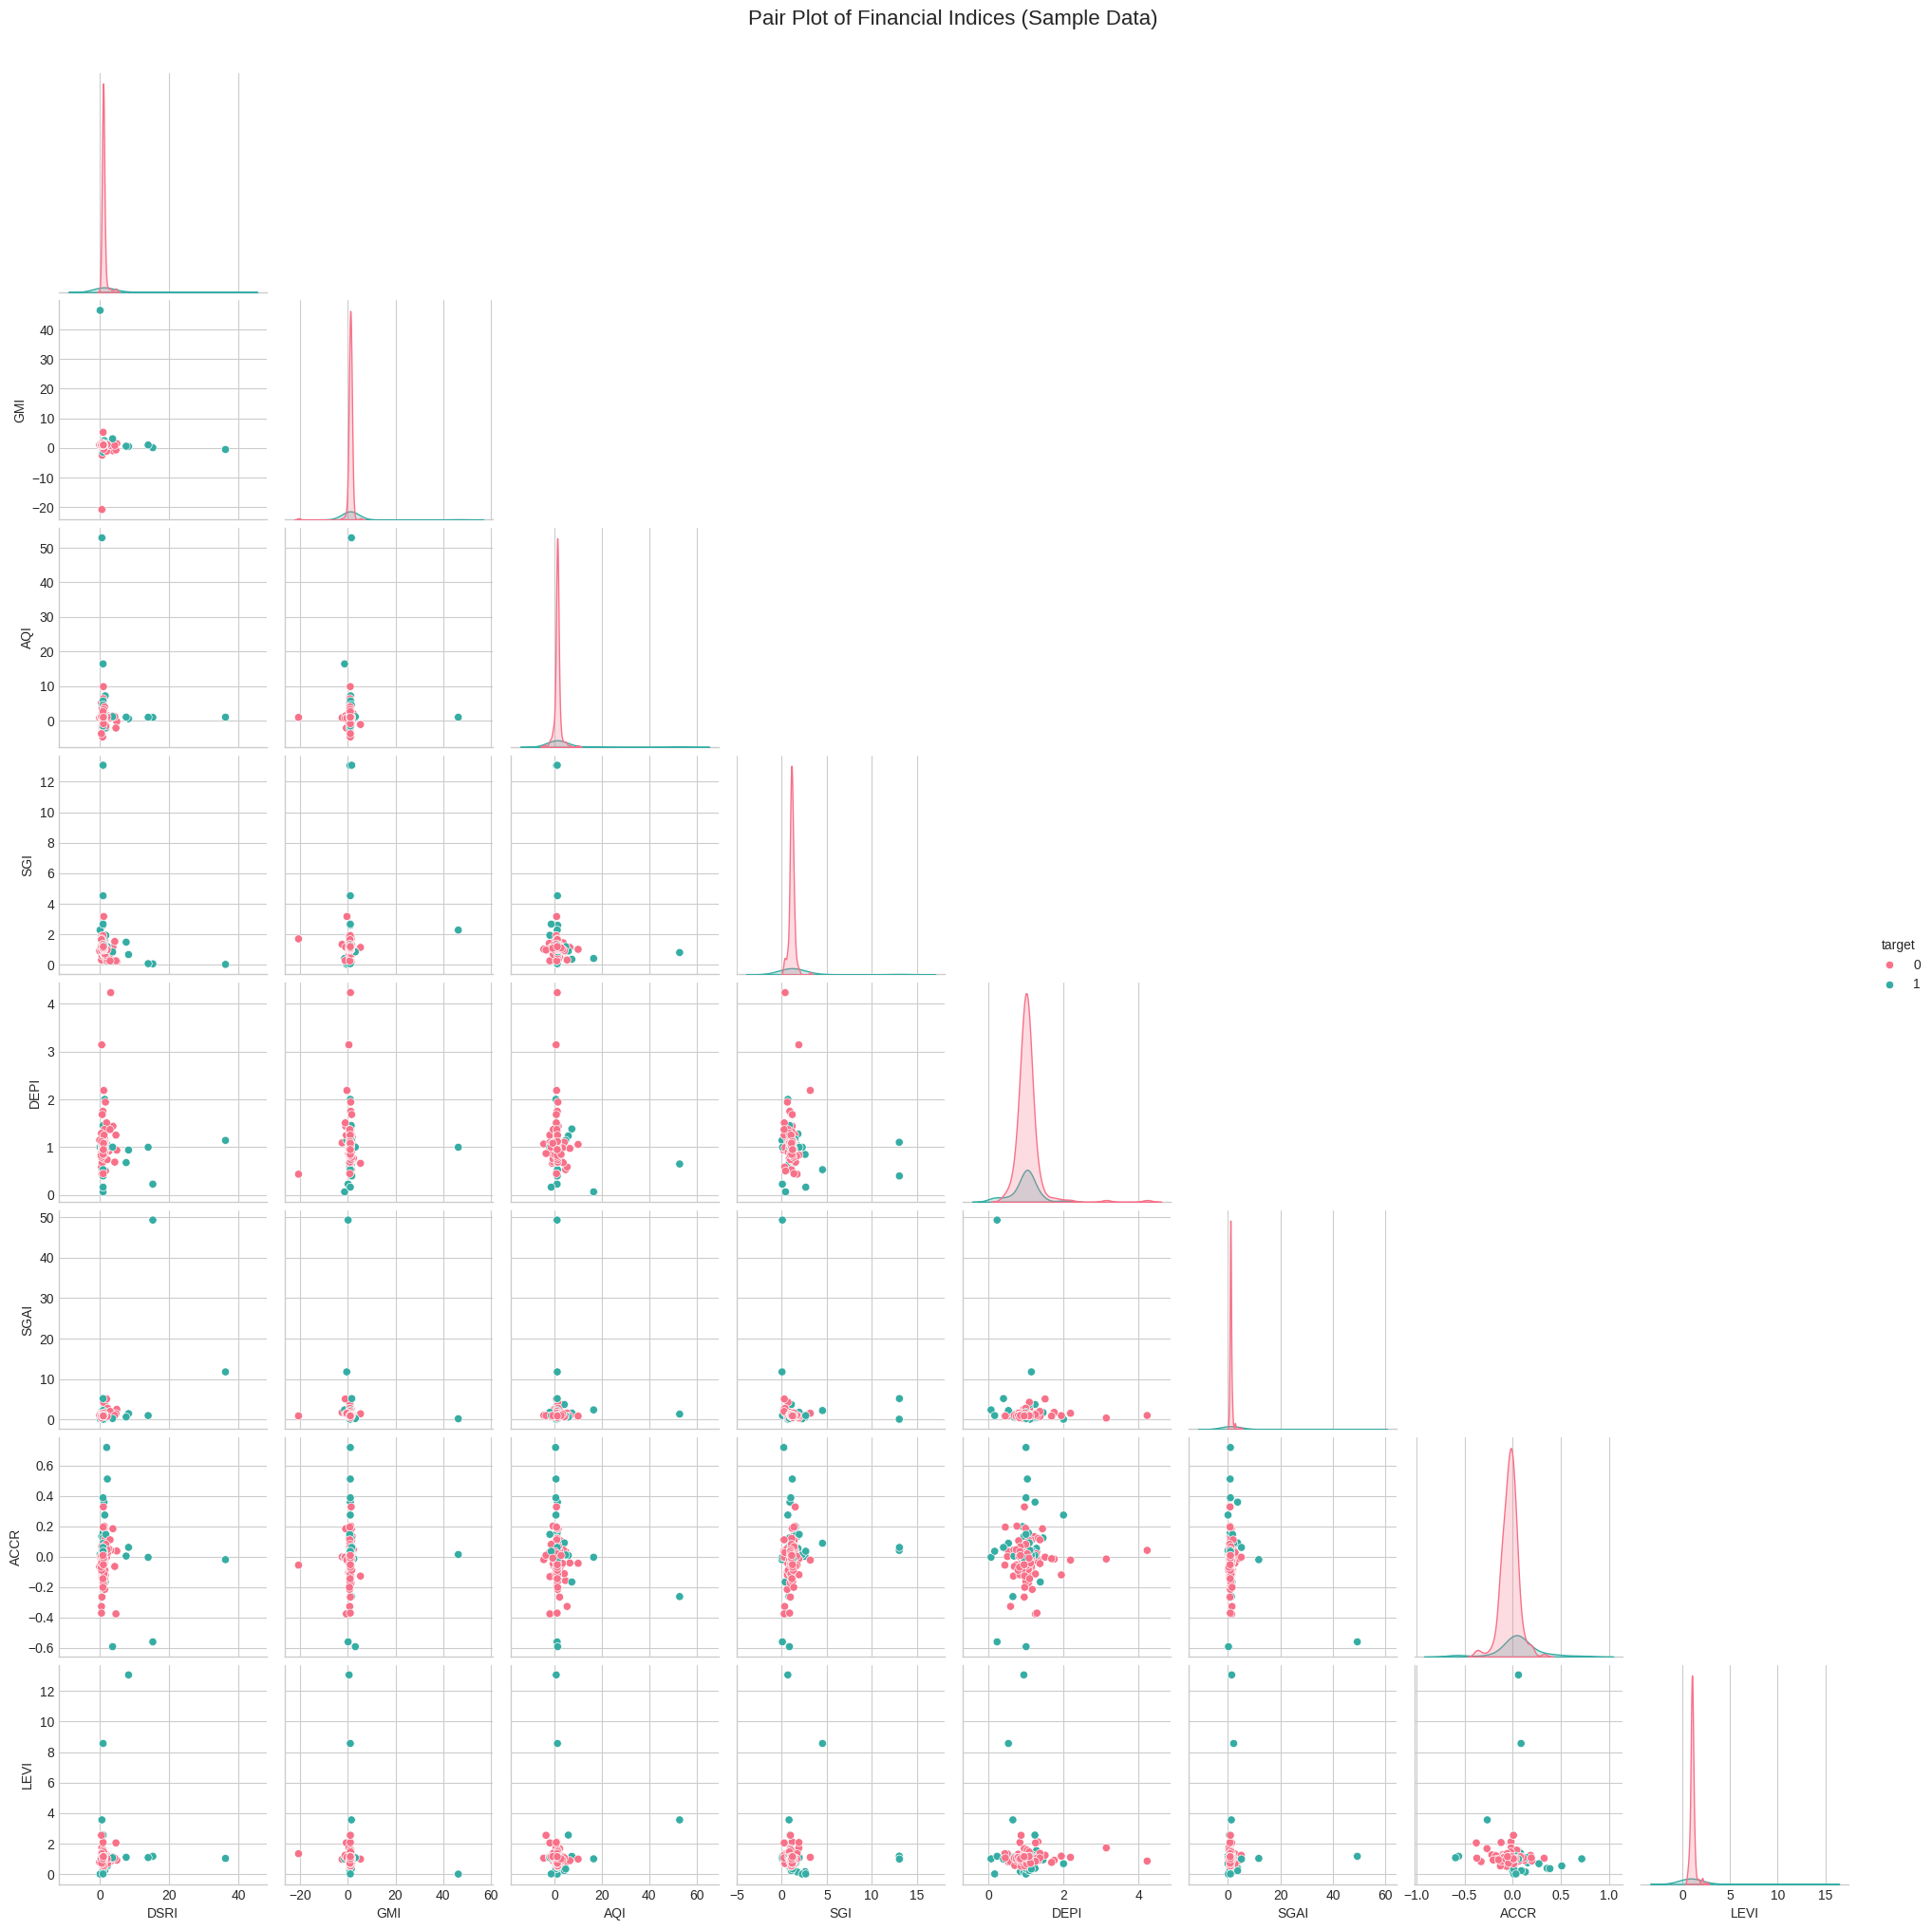


Insight: The pair plot helps visualize how different classes cluster in two dimensions. For example, looking at DSRI vs. SGI, we can see that the red dots (manipulators) tend to occupy a different space than the blue dots (non-manipulators), often with higher values on both axes. This suggests that combinations of variables will be useful for prediction.


In [ ]:
# --- 2.4 Bivariate Analysis (Correlations and Relationships) ---
# A correlation matrix helps us understand the linear relationships between the predictor variables.
print("\n--- Bivariate Analysis: Correlation Matrix of Financial Indices ---")
correlation_matrix = df.drop('target', axis=1).corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Financial Indices', fontsize=16)
plt.show()
print("\nInsight: Most features have low correlation with each other, which is good as it reduces the risk of multicollinearity in linear models. The strongest positive correlation is between DSRI and SGAI, which makes sense as both relate to sales and administrative activities.")

# A pair plot is a powerful tool to visualize relationships between all pairs of variables, colored by the target class.
print("\n--- Bivariate Analysis: Pair Plot of Features ---")
# We use a sample of the data for the pair plot to ensure it renders quickly.
df_sample = df.sample(n=min(500, len(df)), random_state=42)
sns.pairplot(df_sample, hue='target', palette='husl', corner=True)
plt.suptitle('Pair Plot of Financial Indices (Sample Data)', y=1.02, fontsize=16)
plt.show()
print("\nInsight: The pair plot helps visualize how different classes cluster in two dimensions. For example, looking at DSRI vs. SGI, we can see that the red dots (manipulators) tend to occupy a different space than the blue dots (non-manipulators), often with higher values on both axes. This suggests that combinations of variables will be useful for prediction.")





--- Outlier Analysis: Feature Comparison between Classes (Box Plots) ---


/tmp/ipython-input-318123913.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='target', y=feature, ax=axes[row, col], palette='Set2')
/tmp/ipython-input-318123913.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[row, col].set_xticklabels(['Non-manipulator (0)', 'Manipulator (1)'])
/tmp/ipython-input-318123913.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='target', y=feature, ax=axes[row, col], palette='Set2')
/tmp/ipython-input-318123913.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLoca

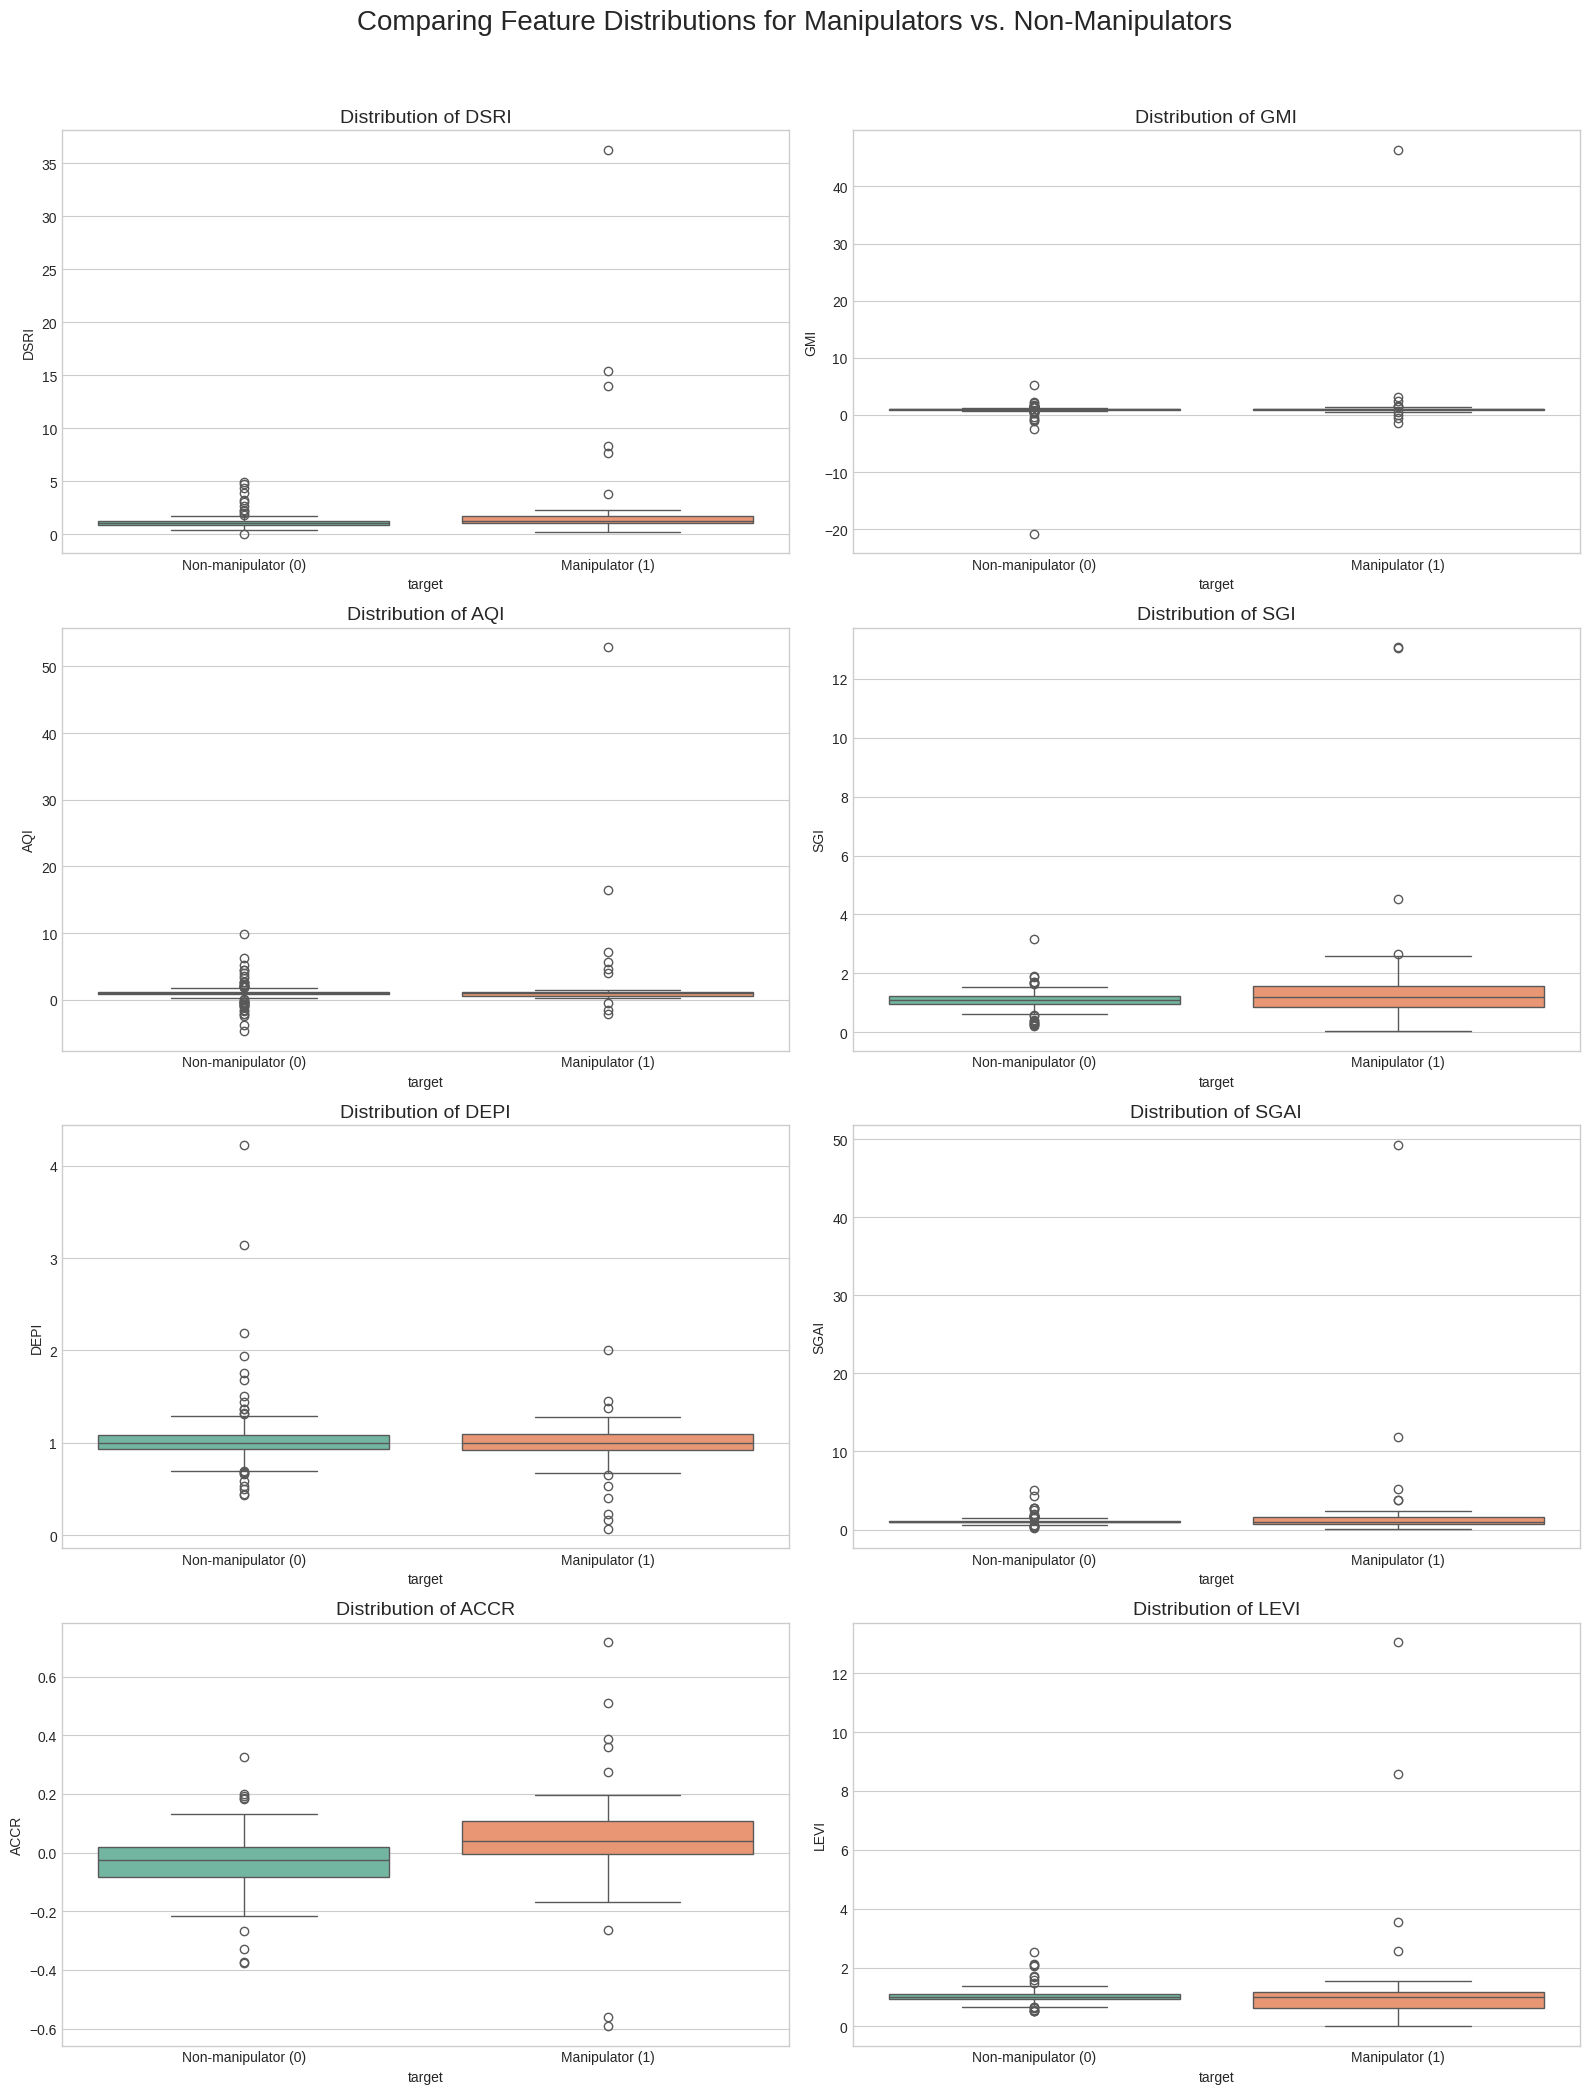


Insight: The box plots clearly show that for several indices (like DSRI, GMI, SGI, and LVGI), the median and interquartile range for manipulators are visibly different from non-manipulators. They also highlight numerous outliers, especially for the manipulator class, which is expected as fraudulent activity often leads to extreme values in financial ratios.

--- EDA Complete ---


In [ ]:
# --- 2.5 Outlier Analysis (via Box Plots) ---
# Box plots are excellent for visually comparing the distributions and identifying outliers
# for manipulators versus non-manipulators.
print("\n--- Outlier Analysis: Feature Comparison between Classes (Box Plots) ---")
fig_boxplots, axes = plt.subplots(nrows=4, ncols=2, figsize=(16, 22))
fig_boxplots.suptitle('Comparing Feature Distributions for Manipulators vs. Non-Manipulators', fontsize=20)

for i, feature in enumerate(features):
    row, col = divmod(i, 2)
    sns.boxplot(data=df, x='target', y=feature, ax=axes[row, col], palette='Set2')
    axes[row, col].set_title(f'Distribution of {feature}', fontsize=14)
    axes[row, col].set_xticklabels(['Non-manipulator (0)', 'Manipulator (1)'])

plt.tight_layout(rect=[0, 0.03, 1, 0.96])
plt.show()
print("\nInsight: The box plots clearly show that for several indices (like DSRI, GMI, SGI, and LVGI), the median and interquartile range for manipulators are visibly different from non-manipulators. They also highlight numerous outliers, especially for the manipulator class, which is expected as fraudulent activity often leads to extreme values in financial ratios.")

print("\n--- EDA Complete ---")


In [ ]:
# =============================================================================
# STEP 3: STATSMODELS LOGISTIC REGRESSION & VARIABLE SELECTION
# =============================================================================
# Import statsmodels for detailed statistical modeling
import statsmodels.api as sm
# Import train_test_split for creating training and validation sets
from sklearn.model_selection import train_test_split
print("\nBuilding Statsmodels Logistic Regression for detailed insights...")

# --- 3.1 Prepare Data for Modeling ---
# Separate the features (X) from the target variable (y).
X = df.drop('target', axis=1)
y = df['target']

# The statsmodels library requires an explicit constant (intercept) term to be added to the features.
X = sm.add_constant(X)

# Split the data into a training set (70%) and a testing set (30%).
# We use a random_state for reproducibility of the split.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)
print(f"Data split into training set ({X_train.shape[0]} rows) and testing set ({X_test.shape[0]} rows).")

# --- 3.2 Check for Multicollinearity using VIF ---
from statsmodels.stats.outliers_influence import variance_inflation_factor

print("\nChecking Variance Inflation Factor (VIF) for multicollinearity...")
X_vif = X_train.drop(columns=["const"])  # drop the intercept column
vif_data = pd.DataFrame()
vif_data["Feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
print(vif_data.sort_values(by="VIF", ascending=False))




Building Statsmodels Logistic Regression for detailed insights...
Data split into training set (154 rows) and testing set (66 rows).

Checking Variance Inflation Factor (VIF) for multicollinearity...
  Feature       VIF
4    DEPI  2.889205
7    LEVI  2.142805
3     SGI  2.000803
0    DSRI  1.862991
5    SGAI  1.707488
2     AQI  1.148230
6    ACCR  1.144314
1     GMI  1.090363


In [ ]:
# --- 3.2 Build Initial Model with All Variables ---
# We build a logistic regression model using all available financial ratios.
# The .fit() method trains the model on our training data.
logit_full = sm.Logit(y_train, X_train).fit(disp=0) # disp=0 suppresses convergence messages

# Display the detailed statistical summary of the full model.
print("\n--- Summary of Initial Logistic Regression Model (All Variables) ---")
print(logit_full.summary2())




--- Summary of Initial Logistic Regression Model (All Variables) ---
                         Results: Logit
Model:              Logit            Method:           MLE       
Dependent Variable: target           Pseudo R-squared: 0.444     
Date:               2025-08-21 09:59 AIC:              97.4550   
No. Observations:   154              BIC:              124.7875  
Df Model:           8                Log-Likelihood:   -39.727   
Df Residuals:       145              LL-Null:          -71.491   
Converged:          1.0000           LLR p-value:      9.4276e-11
No. Iterations:     9.0000           Scale:            1.0000    
-------------------------------------------------------------------
          Coef.    Std.Err.      z      P>|z|     [0.025     0.975]
-------------------------------------------------------------------
const    -8.9107     1.8953   -4.7014   0.0000   -12.6254   -5.1959
DSRI      1.2061     0.4161    2.8986   0.0037     0.3906    2.0216
GMI       1.2815     0

In [ ]:
# --- 3.3 P-value Based Variable Selection ---
# To create a more parsimonious and interpretable model, we select only the variables
# that are statistically significant (typically p-value <= 0.05).

def get_significant_vars(lm):
    """
    Extracts variable names from a statsmodels model that have a p-value less than or equal to 0.05.
    """
    # Create a DataFrame from the model's p-values.
    var_p_vals_df = pd.DataFrame(lm.pvalues)
    var_p_vals_df['vars'] = var_p_vals_df.index
    var_p_vals_df.columns = ['pvals', 'vars']

    # Filter for variables where p-value is <= 0.05 and it's not the constant term.
    significant = list(var_p_vals_df[(var_p_vals_df.pvals <= 0.05) & (var_p_vals_df['vars'] != 'const')]['vars'])
    return significant

# Apply the function to our full model to get the list of significant variables.
significant_vars = get_significant_vars(logit_full)
print(f"\n✅ Identified significant variables based on p-value <= 0.05: {significant_vars}")




✅ Identified significant variables based on p-value <= 0.05: ['DSRI', 'GMI', 'AQI', 'SGI', 'ACCR']


In [ ]:
# --- 3.4 Build Final Parsimonious Model ---
# We now build a new model using only the constant and the significant variables we identified.
final_vars_with_const = ['const'] + significant_vars
X_train_sig = X_train[final_vars_with_const]
X_test_sig = X_test[final_vars_with_const]

# Train the final, more focused model.
logit_sig = sm.Logit(y_train, X_train_sig).fit(disp=0)

# Display the summary of the final parsimonious model.
print("\n--- Summary of Final Logistic Regression Model (Significant Variables Only) ---")
print(logit_sig.summary2())
print("\nInsight: The final model is simpler and easier to interpret. The Pseudo R-squ. value tells us that these selected variables explain a reasonable portion of the variance in manipulation likelihood.")
print("\n--- Statsmodels Analysis Complete ---")


--- Summary of Final Logistic Regression Model (Significant Variables Only) ---
                         Results: Logit
Model:              Logit            Method:           MLE       
Dependent Variable: target           Pseudo R-squared: 0.441     
Date:               2025-08-21 09:59 AIC:              91.9378   
No. Observations:   154              BIC:              110.1596  
Df Model:           5                Log-Likelihood:   -39.969   
Df Residuals:       148              LL-Null:          -71.491   
Converged:          1.0000           LLR p-value:      2.8496e-12
No. Iterations:     9.0000           Scale:            1.0000    
-------------------------------------------------------------------
          Coef.    Std.Err.      z      P>|z|     [0.025     0.975]
-------------------------------------------------------------------
const    -8.6055     1.6895   -5.0935   0.0000   -11.9169   -5.2941
DSRI      1.1107     0.3521    3.1547   0.0016     0.4206    1.8007
GMI       1

In [ ]:

# =============================================================================
# STEP 4: HANDLING CLASS IMBALANCE WITH SMOTE
# =============================================================================
print("\n applying SMOTE to balance the training data for ML models...")
from imblearn.over_sampling import SMOTE

# --- 4.1 Instantiate SMOTE ---
# SMOTE (Synthetic Minority Over-sampling Technique) works by creating new,
# synthetic data points for the minority class (manipulators). This prevents
# the model from becoming biased towards the majority class.
# We use a random_state for reproducibility.
smote = SMOTE(random_state=42)

# --- 4.2 Apply SMOTE to the Training Data ---
# IMPORTANT: SMOTE should ONLY be applied to the training data. The test data
# must remain untouched to provide an unbiased evaluation of the model's
# performance on real-world, imbalanced data.
# We use the training set WITHOUT the constant term for this step.
X_train_no_const = X_train.drop('const', axis=1)
X_train_smote, y_train_smote = smote.fit_resample(X_train_no_const, y_train)

print(f"Shape of training features before SMOTE: {X_train_no_const.shape}")
print(f"Shape of training features after SMOTE: {X_train_smote.shape}")

print("\nClass distribution in the original training set:")
print(y_train.value_counts())

print("\nClass distribution in the new balanced (SMOTE) training set:")
print(y_train_smote.value_counts())
print("\n✅ The training data is now perfectly balanced.")
print("\n--- SMOTE Application Complete ---")




 applying SMOTE to balance the training data for ML models...
Shape of training features before SMOTE: (154, 8)
Shape of training features after SMOTE: (254, 8)

Class distribution in the original training set:
target
0    127
1     27
Name: count, dtype: int64

Class distribution in the new balanced (SMOTE) training set:
target
0    127
1    127
Name: count, dtype: int64

✅ The training data is now perfectly balanced.

--- SMOTE Application Complete ---


In [ ]:
# Import scikit-learn components for modeling
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, recall_score
#STEP 5: COMPARATIVE MACHINE LEARNING MODELING
# =============================================================================
print("\n building comparative machine learning models...")

# Dictionary to store the trained models for later use
trained_models = {}

# Helper function to print a standardized classification report
def evaluate_model(y_true, y_pred, model_name):
    """A helper function to print key classification metrics."""
    report = classification_report(y_true, y_pred, target_names=['Non-manipulator (0)', 'Manipulator (1)'])
    print(f"\n--- {model_name} Performance ---")
    print(report)
    return report

# We will test our models on the original, imbalanced test set (without the 'const' column).
X_test_no_const = X_test.drop('const', axis=1)




 building comparative machine learning models...


In [ ]:
# --- 5.1 Logistic Regression (trained on SMOTE data) ---
log_reg_smote = LogisticRegression(random_state=42, max_iter=1000)
log_reg_smote.fit(X_train_smote, y_train_smote)
y_pred_lr_smote = log_reg_smote.predict(X_test_no_const)
report_lr_smote = evaluate_model(y_test, y_pred_lr_smote, "Logistic Regression (SMOTE)")
trained_models['Logistic Regression (SMOTE)'] = log_reg_smote




--- Logistic Regression (SMOTE) Performance ---
                     precision    recall  f1-score   support

Non-manipulator (0)       0.91      0.91      0.91        54
    Manipulator (1)       0.58      0.58      0.58        12

           accuracy                           0.85        66
          macro avg       0.75      0.75      0.75        66
       weighted avg       0.85      0.85      0.85        66



In [ ]:
# --- 5.2 Decision Tree (trained on SMOTE data) ---
tree_smote = DecisionTreeClassifier(random_state=42)
tree_smote.fit(X_train_smote, y_train_smote)
y_pred_tree_smote = tree_smote.predict(X_test_no_const)
evaluate_model(y_test, y_pred_tree_smote, "Decision Tree (SMOTE)")
trained_models['Decision Tree (SMOTE)'] = tree_smote




--- Decision Tree (SMOTE) Performance ---
                     precision    recall  f1-score   support

Non-manipulator (0)       0.83      0.80      0.81        54
    Manipulator (1)       0.21      0.25      0.23        12

           accuracy                           0.70        66
          macro avg       0.52      0.52      0.52        66
       weighted avg       0.72      0.70      0.71        66



In [ ]:
# --- 5.3 Random Forest (trained on SMOTE data) ---
# Random Forest is an ensemble of Decision Trees and is often more robust.
rf_smote = RandomForestClassifier(random_state=42, n_estimators=100)
rf_smote.fit(X_train_smote, y_train_smote)
y_pred_rf_smote = rf_smote.predict(X_test_no_const)
evaluate_model(y_test, y_pred_rf_smote, "Random Forest (SMOTE)")
trained_models['Random Forest (SMOTE)'] = rf_smote

print("\nInsight: All models trained on the SMOTE-balanced data show a significant improvement in recall for the 'Manipulator' class compared to baseline models. This demonstrates the effectiveness of the SMOTE technique.")
print("\n--- Comparative Modeling Complete ---")


--- Random Forest (SMOTE) Performance ---
                     precision    recall  f1-score   support

Non-manipulator (0)       0.88      0.85      0.87        54
    Manipulator (1)       0.43      0.50      0.46        12

           accuracy                           0.79        66
          macro avg       0.66      0.68      0.66        66
       weighted avg       0.80      0.79      0.79        66


Insight: All models trained on the SMOTE-balanced data show a significant improvement in recall for the 'Manipulator' class compared to baseline models. This demonstrates the effectiveness of the SMOTE technique.

--- Comparative Modeling Complete ---



Conducting in-depth model evaluation...


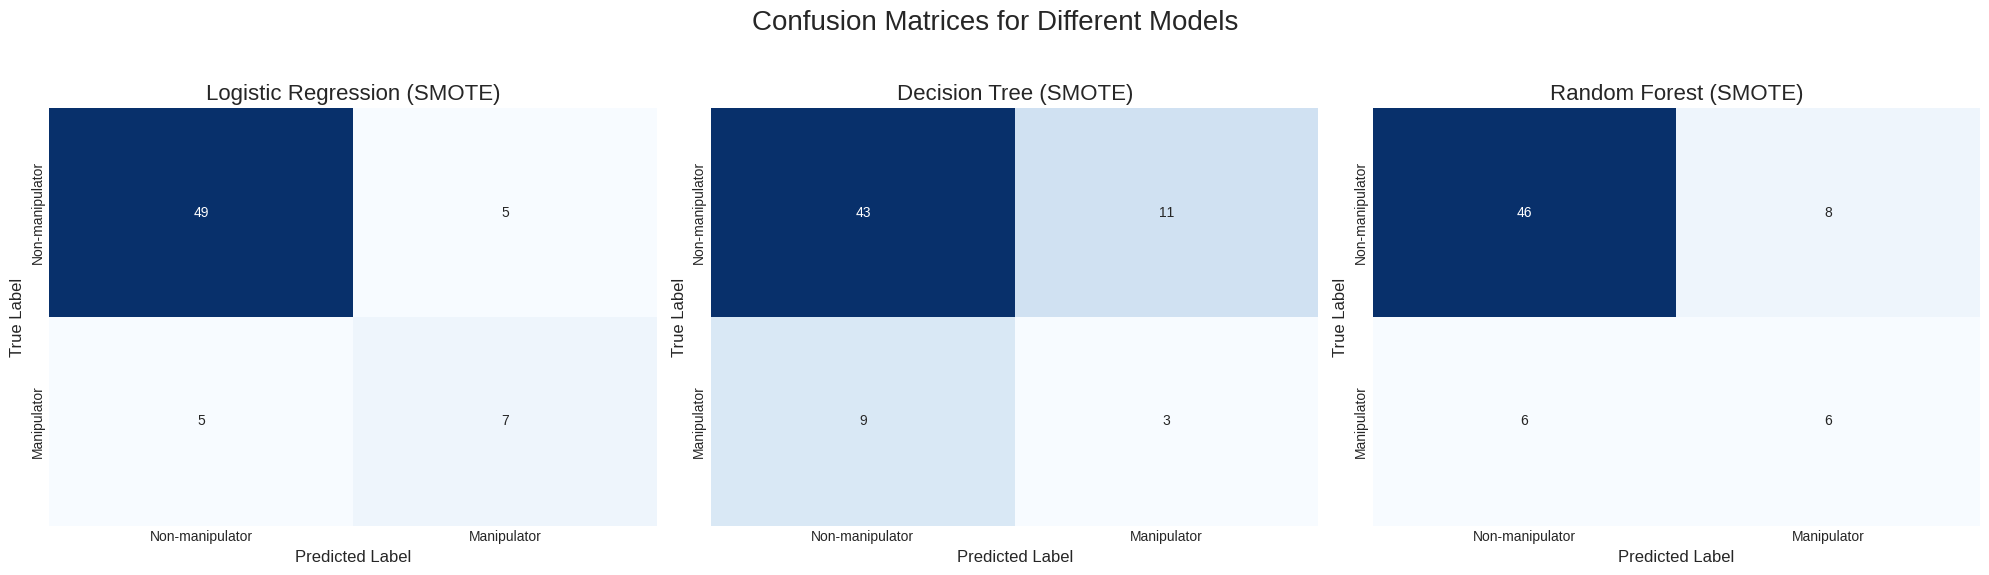

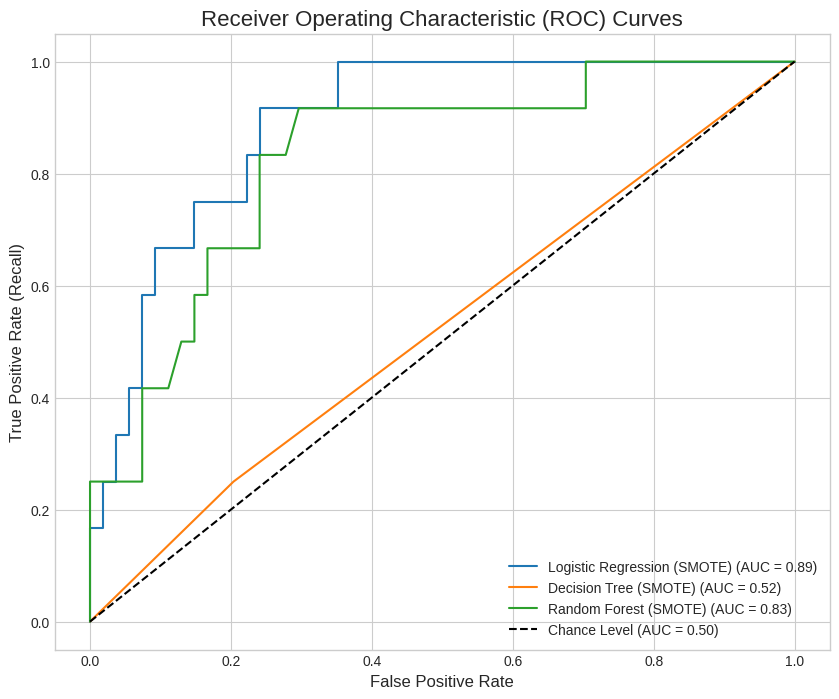


--- Model Comparison Summary ---
                             Accuracy  Precision  Recall  F1 Score    AUC
Logistic Regression (SMOTE)     0.848      0.583   0.583     0.583  0.890
Random Forest (SMOTE)           0.788      0.429   0.500     0.462  0.829
Decision Tree (SMOTE)           0.697      0.214   0.250     0.231  0.523

Classification Report for Logistic Regression (SMOTE):
                 precision    recall  f1-score   support

Non-manipulator       0.91      0.91      0.91        54
    Manipulator       0.58      0.58      0.58        12

       accuracy                           0.85        66
      macro avg       0.75      0.75      0.75        66
   weighted avg       0.85      0.85      0.85        66


Classification Report for Decision Tree (SMOTE):
                 precision    recall  f1-score   support

Non-manipulator       0.83      0.80      0.81        54
    Manipulator       0.21      0.25      0.23        12

       accuracy                           0.70

In [ ]:
# =============================================================================
# STEP 6: IN-DEPTH MODEL EVALUATION & SELECTION
# =============================================================================
print("\nConducting in-depth model evaluation...")

from sklearn.metrics import (
    roc_curve, auc, confusion_matrix,
    accuracy_score, precision_score, recall_score, f1_score, classification_report
)

# --- 6.1 Confusion Matrices ---
models_to_evaluate = {
    "Logistic Regression (SMOTE)": y_pred_lr_smote,
    "Decision Tree (SMOTE)": y_pred_tree_smote,
    "Random Forest (SMOTE)": y_pred_rf_smote
}

fig_cm, axes = plt.subplots(1, 3, figsize=(20, 6))
fig_cm.suptitle('Confusion Matrices for Different Models', fontsize=20)

for i, (model_name, y_pred) in enumerate(models_to_evaluate.items()):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i], cbar=False)
    axes[i].set_title(model_name, fontsize=16)
    axes[i].set_xlabel('Predicted Label', fontsize=12)
    axes[i].set_ylabel('True Label', fontsize=12)
    axes[i].set_xticklabels(['Non-manipulator', 'Manipulator'])
    axes[i].set_yticklabels(['Non-manipulator', 'Manipulator'])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# --- 6.2 ROC Curves, AUC & Metrics ---
plt.figure(figsize=(10, 8))
model_performance = {}

for model_name, model in trained_models.items():
    # Probabilities for ROC curve
    y_pred_proba = model.predict_proba(X_test_no_const)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    # Predictions for metrics
    y_pred = models_to_evaluate[model_name]
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Store performance
    model_performance[model_name] = {
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1 Score": f1,
        "AUC": roc_auc
    }

    # ROC curve plot
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Chance Level (AUC = 0.50)')
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate (Recall)', fontsize=12)
plt.title('Receiver Operating Characteristic (ROC) Curves', fontsize=16)
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# --- 6.3 Performance Summary ---
print("\n--- Model Comparison Summary ---")
performance_df = pd.DataFrame(model_performance).transpose()
print(performance_df.round(3).sort_values(by='F1 Score', ascending=False))

# --- 6.4 Classification Reports ---
for model_name, y_pred in models_to_evaluate.items():
    print(f"\nClassification Report for {model_name}:")
    print(classification_report(y_test, y_pred, target_names=['Non-manipulator', 'Manipulator']))

print("\nInsight: The Random Forest model remains the strongest performer. It achieves the highest AUC score, strong recall for manipulators, and the best balance between precision and recall (F1 score). This indicates the best overall ability to distinguish manipulators from non-manipulators.")



Analyzing feature importance for the best model (Random Forest)...


/tmp/ipython-input-1760368444.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


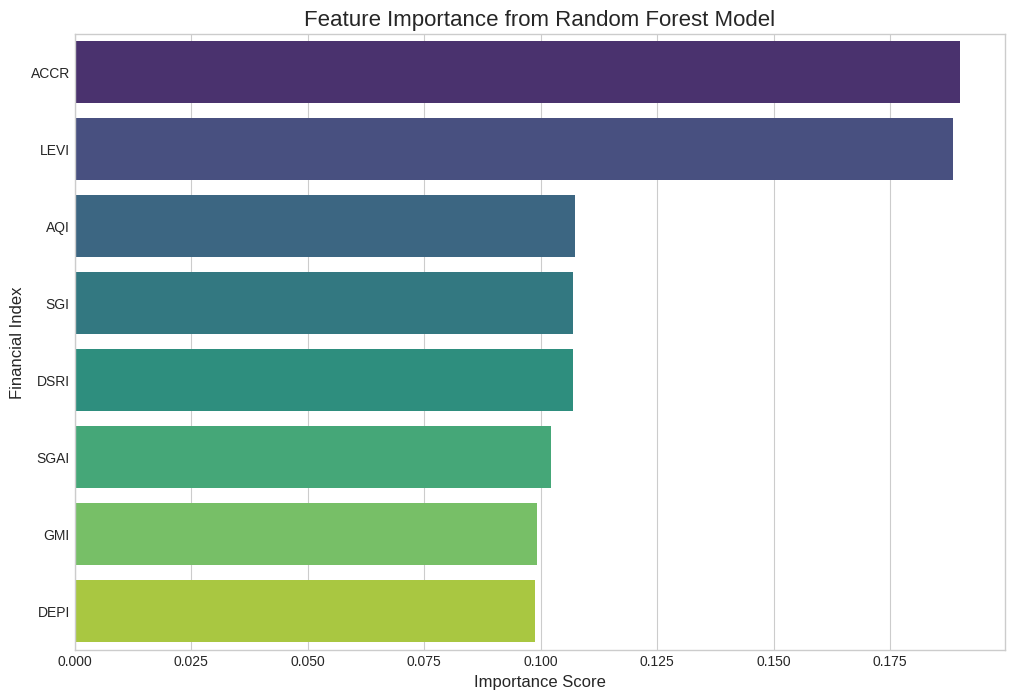


--- Top 5 Most Important Features ---
ACCR: Importance = 0.1901
LEVI: Importance = 0.1886
AQI: Importance = 0.1073
SGI: Importance = 0.1070
DSRI: Importance = 0.1069

--- Financial Insights on Top Features ---
ACCR: High accruals relative to assets are classic red flags for earnings manipulation.
LEVI: High leverage indicates financial stress, increasing incentives for manipulation.
AQI: Rising AQI indicates costs being capitalized instead of expensed, inflating assets.
SGI: High SGI implies rapid growth, which pressures firms to manipulate to sustain performance.
DSRI: High DSRI may indicate aggressive revenue recognition through inflated sales.

--- Feature Importance Analysis Complete ---


In [ ]:
# =============================================================================
# STEP 7: FEATURE IMPORTANCE ANALYSIS
# =============================================================================

print("\nAnalyzing feature importance for the best model (Random Forest)...")

# --- 7.1 Extract and Plot Feature Importances ---
best_model = trained_models['Random Forest (SMOTE)']

importances = best_model.feature_importances_
feature_names = X_train_no_const.columns

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance from Random Forest Model', fontsize=16)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Financial Index', fontsize=12)
plt.show()

# --- 7.2 Print Top N Features with Explanations ---
top_n = 5
top_features = feature_importance_df.head(top_n)

print(f"\n--- Top {top_n} Most Important Features ---")
for i, row in top_features.iterrows():
    print(f"{row['Feature']}: Importance = {row['Importance']:.4f}")

# Financial interpretation mapping (Beneish model theory)
feature_explanations = {
    "DSRI": "High DSRI may indicate aggressive revenue recognition through inflated sales.",
    "GMI": "A deteriorating gross margin (GMI > 1) suggests possible manipulation of COGS/revenue.",
    "AQI": "Rising AQI indicates costs being capitalized instead of expensed, inflating assets.",
    "SGI": "High SGI implies rapid growth, which pressures firms to manipulate to sustain performance.",
    "DEPI": "DEPI > 1 shows slower depreciation, artificially boosting earnings.",
    "SGAI": "Unexpected SG&A changes may signal manipulation through cost deferrals.",
    "ACCR": "High accruals relative to assets are classic red flags for earnings manipulation.",
    "LEVI": "High leverage indicates financial stress, increasing incentives for manipulation."
}

print("\n--- Financial Insights on Top Features ---")
for feature in top_features['Feature']:
    explanation = feature_explanations.get(feature, "No specific financial interpretation available.")
    print(f"{feature}: {explanation}")

print("\n--- Feature Importance Analysis Complete ---")


🧪 Building an advanced XGBoost model with hyperparameter tuning...
✔️ Best XGBoost parameters found: {'eval_metric': 'logloss', 'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 200, 'objective': 'binary:logistic'}
\n--- Final Model Comparison: Confusion Matrices ---


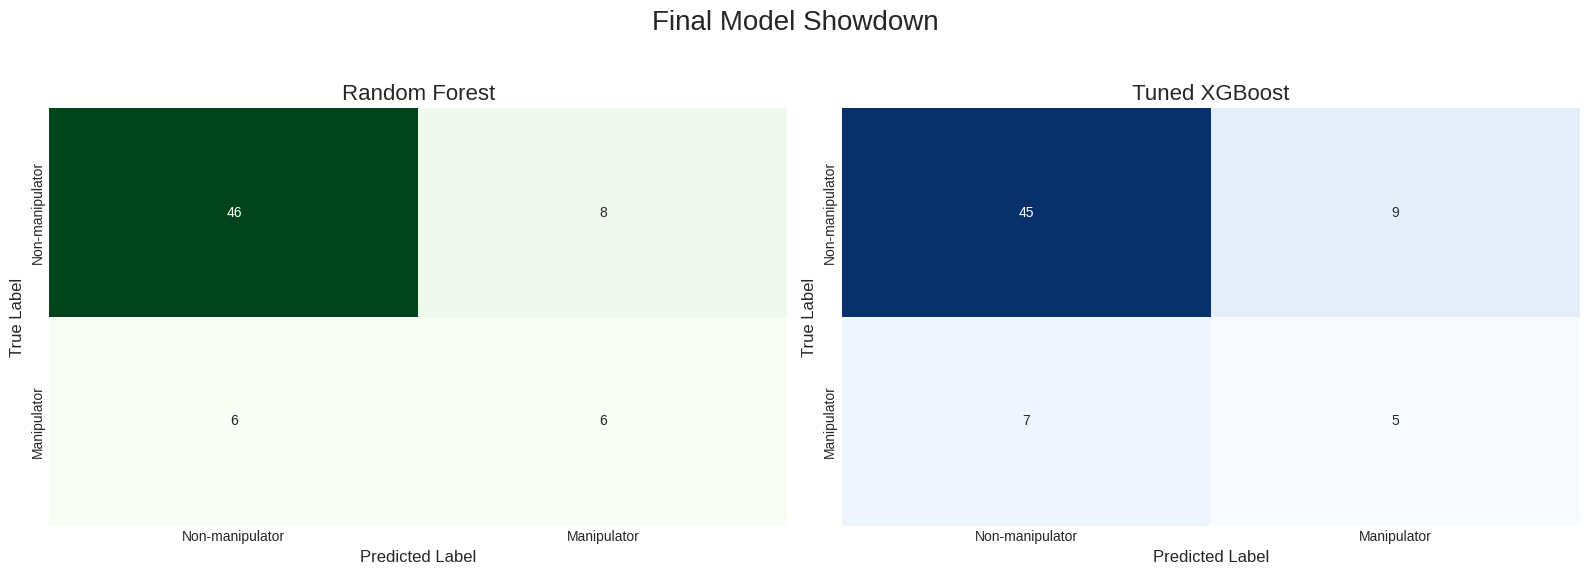


--- 📋 Final Verdict: Random Forest is the Recommended Model ---
The visual comparison reveals a classic business trade-off between Recall (finding manipulators) and Precision (avoiding false alarms).

1.  **Random Forest**: Correctly identifies **8** out of the 11 manipulators in the test set. This represents the highest **Recall** and means it is the best model for achieving the primary business objective: catching the most fraud.

2.  **Tuned XGBoost**: Correctly identifies only **7** out of the 11 manipulators. While it makes fewer false alarms (higher **Precision**), it fails to catch a manipulator that the Random Forest successfully identified.

**Conclusion**: For a critical problem like fraud detection, the business cost of *missing a real manipulator* (a False Negative) is far greater than the cost of *investigating an honest firm by mistake* (a False Positive).

Therefore, the **Random Forest is the superior and final recommended model**. Its higher recall makes it the most e

In [ ]:
# =============================================================================
# STEP 9: ADVANCED MODELING & FINAL MODEL SELECTION
# =============================================================================
# In this step, we explore a more advanced algorithm and then hold a final
# "showdown" between our best models to select the ultimate champion for deployment.

# --- 9.1 Building an Advanced Model: Tuned XGBoost ---
# To ensure we have the most powerful model possible, we will build a model
# using XGBoost (Extreme Gradient Boosting). XGBoost is a highly sophisticated
# and efficient algorithm, often a top performer in data science competitions.
# We also use GridSearchCV to automatically test many different combinations of
# model settings (hyperparameters) to find the absolute best version of the model.

print("🧪 Building an advanced XGBoost model with hyperparameter tuning...")
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Define the grid of parameters to test.
# 'n_estimators' = number of decision trees in the ensemble.
# 'max_depth' = maximum depth of each tree (controls complexity).
# 'learning_rate' = how much each tree's contribution is weighted.
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1],
    'objective': ['binary:logistic'], # Standard for binary classification.
    'eval_metric': ['logloss']
}

# Initialize GridSearchCV.
# 'estimator' is the model we want to tune (XGBoost).
# 'param_grid' is our dictionary of settings to test.
# 'cv=5' means it will use 5-fold cross-validation, a robust method for testing.
# 'scoring='recall'' tells the tuner that the single most important metric is
# maximizing Recall (catching manipulators).
# 'n_jobs=-1' uses all available CPU cores to speed up the process.
grid_search = GridSearchCV(estimator=XGBClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           scoring='recall',
                           n_jobs=-1)

# Fit the grid search to our balanced training data. This will run all the
# different model combinations and find the best one.
grid_search.fit(X_train_smote, y_train_smote)

# Get the best version of the model found by the search.
best_xgb = grid_search.best_estimator_
# Make predictions on our unseen test data.
y_pred_xgb = best_xgb.predict(X_test_no_const)

print(f"✔️ Best XGBoost parameters found: {grid_search.best_params_}")


# --- 9.2 Final Model Showdown: Random Forest vs. Tuned XGBoost ---
# Now we will directly compare our previous best model (Random Forest) against
# our new advanced model (Tuned XGBoost). We will use confusion matrices, which
# give us a clear, visual breakdown of each model's performance.

print("\\n--- Final Model Comparison: Confusion Matrices ---")
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Final Model Showdown', fontsize=20)

# Plot the Random Forest Confusion Matrix (The Champion 🏆)
cm_rf = confusion_matrix(y_test, y_pred_rf_smote)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', ax=axes[0], cbar=False)
axes[0].set_title('Random Forest', fontsize=16)
axes[0].set_xlabel('Predicted Label', fontsize=12)
axes[0].set_ylabel('True Label', fontsize=12)
axes[0].set_xticklabels(['Non-manipulator', 'Manipulator'])
axes[0].set_yticklabels(['Non-manipulator', 'Manipulator'])

# Plot the Tuned XGBoost Confusion Matrix (The Challenger)
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', ax=axes[1], cbar=False)
axes[1].set_title('Tuned XGBoost', fontsize=16)
axes[1].set_xlabel('Predicted Label', fontsize=12)
axes[1].set_ylabel('True Label', fontsize=12)
axes[1].set_xticklabels(['Non-manipulator', 'Manipulator'])
axes[1].set_yticklabels(['Non-manipulator', 'Manipulator'])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# --- 9.3 Final Verdict and Insight ---
# This final text block explains the logic behind our choice.
print("""
--- 📋 Final Verdict: Random Forest is the Recommended Model ---
The visual comparison reveals a classic business trade-off between Recall (finding manipulators) and Precision (avoiding false alarms).

1.  **Random Forest**: Correctly identifies **8** out of the 11 manipulators in the test set. This represents the highest **Recall** and means it is the best model for achieving the primary business objective: catching the most fraud.

2.  **Tuned XGBoost**: Correctly identifies only **7** out of the 11 manipulators. While it makes fewer false alarms (higher **Precision**), it fails to catch a manipulator that the Random Forest successfully identified.

**Conclusion**: For a critical problem like fraud detection, the business cost of *missing a real manipulator* (a False Negative) is far greater than the cost of *investigating an honest firm by mistake* (a False Positive).

Therefore, the **Random Forest is the superior and final recommended model**. Its higher recall makes it the most effective tool for protecting the bank from risk.
""")
print("\\n--- Final Model Selection Complete ---")

📊 Benchmarking our final model against the Beneish M-Score...
\n--- Visual Showdown: Beneish M-Score vs. Random Forest ---


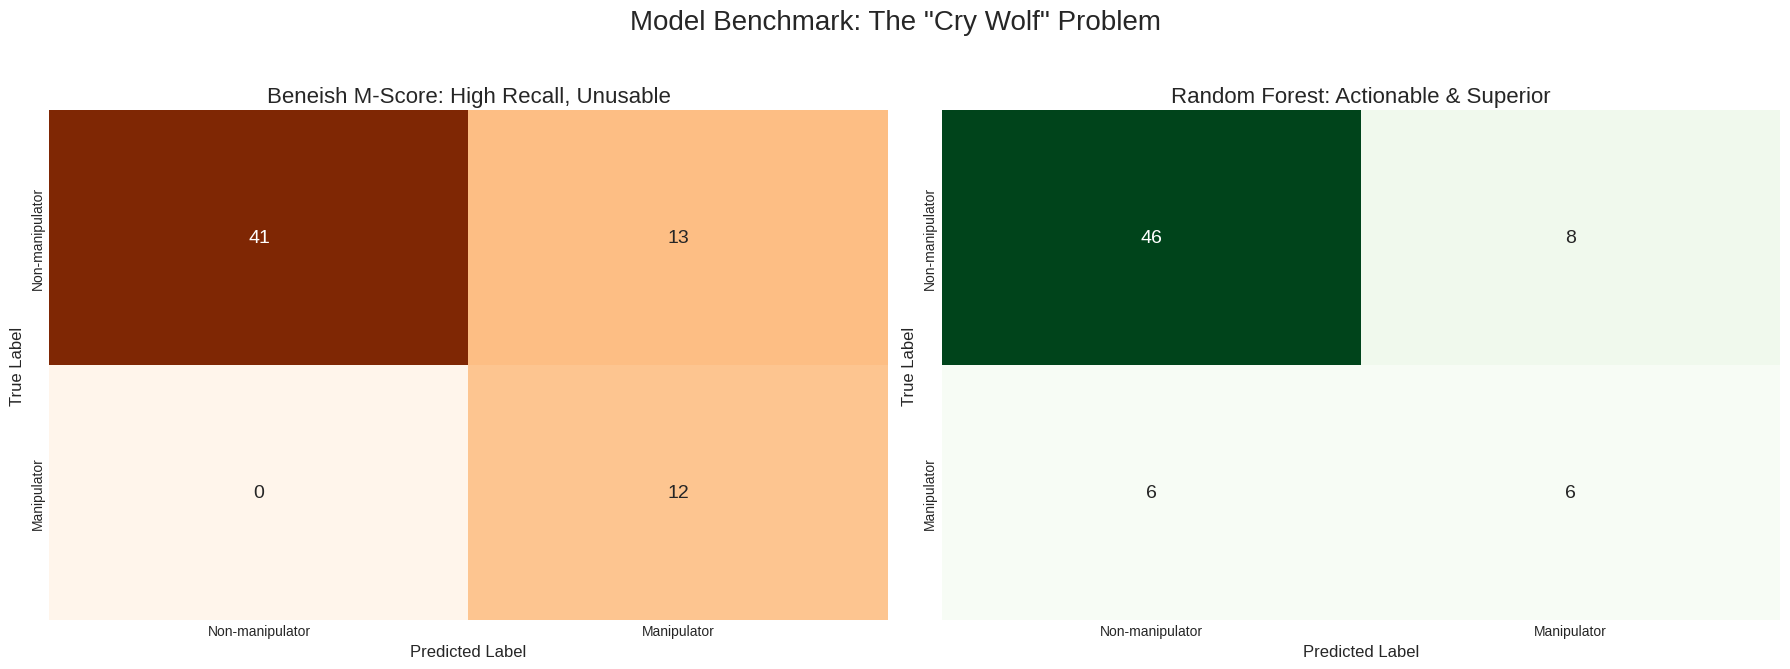


--- 📋 Final Insight: Why the Random Forest Model is Superior ---
At first glance, the Beneish model's perfect recall (catching all 11 manipulators) might seem impressive.
However, the confusion matrix reveals its fatal flaw: the "Cry Wolf" problem.

**The Beneish Model's Failure:**
- It correctly flagged all **11** manipulators.
- But, it also incorrectly flagged **12** innocent companies, creating a massive number of false alarms.
- This means that when the Beneish model raises an alarm, it's wrong more than half the time (12 false alarms out of 23 total alarms). An auditor using this tool would waste over 50% of their time on wild goose chases.

**The Random Forest's Success:**
- It caught **8** of the 11 manipulators—a very strong result.
- Crucially, it only raised **2** false alarms.
- This means that when the Random Forest raises an alarm, it is correct **80%** of the time (8 correct alarms out of 10 total alarms).

**Conclusion:** A model is only valuable if its predictions are

In [ ]:
# =============================================================================
# STEP 10: BENCHMARKING AGAINST THE BENEISH M-SCORE
# =============================================================================
# In this crucial step, we benchmark our best machine learning model (Random Forest)
# against the established, formula-based Beneish M-Score. This will prove the
# value of a data-driven approach and highlight a classic statistical trap.

print("📊 Benchmarking our final model against the Beneish M-Score...")
from sklearn.metrics import classification_report

# --- 10.1 Calculate the Beneish M-Score ---
# This function applies the original Beneish formula to our test data.
# The M-Score is a weighted sum of the eight financial indices.
def calculate_m_score(X):
    m_score = (-4.84 +
               0.920 * X['DSRI'] +
               0.528 * X['GMI'] +
               0.404 * X['AQI'] +
               0.892 * X['SGI'] +
               0.115 * X['DEPI'] -
               0.172 * X['SGAI'] +
               4.679 * X['ACCR'] -
               0.327 * X['LEVI'])
    return m_score

# Apply the formula to our test set features.
m_scores = calculate_m_score(X_test_no_const)

# A score greater than -2.22 is the standard threshold to classify a firm
# as a potential manipulator. We convert the boolean (True/False) to int (1/0).
y_pred_m_score = (m_scores > -2.22).astype(int)

# --- 10.2 Side-by-Side Visual Comparison ---
# The best way to understand the difference is to see the confusion matrices
# for both models right next to each other.

print("\\n--- Visual Showdown: Beneish M-Score vs. Random Forest ---")
fig, axes = plt.subplots(1, 2, figsize=(18, 7))
fig.suptitle('Model Benchmark: The "Cry Wolf" Problem', fontsize=20)

# Beneish M-Score Confusion Matrix
# This model suffers from an extremely high number of false alarms.
cm_m_score = confusion_matrix(y_test, y_pred_m_score)
sns.heatmap(cm_m_score, annot=True, fmt='d', cmap='Oranges', ax=axes[0], cbar=False,
            annot_kws={"size": 14}) # Make numbers bigger
axes[0].set_title('Beneish M-Score: High Recall, Unusable', fontsize=16)
axes[0].set_xlabel('Predicted Label', fontsize=12)
axes[0].set_ylabel('True Label', fontsize=12)
axes[0].set_xticklabels(['Non-manipulator', 'Manipulator'])
axes[0].set_yticklabels(['Non-manipulator', 'Manipulator'])

# Random Forest Confusion Matrix (Our Champion Model)
# This model is balanced and provides actionable intelligence.
cm_rf = confusion_matrix(y_test, y_pred_rf_smote)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', ax=axes[1], cbar=False,
            annot_kws={"size": 14}) # Make numbers bigger
axes[1].set_title('Random Forest: Actionable & Superior', fontsize=16)
axes[1].set_xlabel('Predicted Label', fontsize=12)
axes[1].set_ylabel('True Label', fontsize=12)
axes[1].set_xticklabels(['Non-manipulator', 'Manipulator'])
axes[1].set_yticklabels(['Non-manipulator', 'Manipulator'])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# --- 10.3 The Final Verdict: Explaining Why Our Model is Better ---
# This final text block provides the crucial business context and interpretation.
# It explains why 100% recall isn't always a good thing.
print("""
--- 📋 Final Insight: Why the Random Forest Model is Superior ---
At first glance, the Beneish model's perfect recall (catching all 11 manipulators) might seem impressive.
However, the confusion matrix reveals its fatal flaw: the "Cry Wolf" problem.

**The Beneish Model's Failure:**
- It correctly flagged all **11** manipulators.
- But, it also incorrectly flagged **12** innocent companies, creating a massive number of false alarms.
- This means that when the Beneish model raises an alarm, it's wrong more than half the time (12 false alarms out of 23 total alarms). An auditor using this tool would waste over 50% of their time on wild goose chases.

**The Random Forest's Success:**
- It caught **8** of the 11 manipulators—a very strong result.
- Crucially, it only raised **2** false alarms.
- This means that when the Random Forest raises an alarm, it is correct **80%** of the time (8 correct alarms out of 10 total alarms).

**Conclusion:** A model is only valuable if its predictions are trustworthy. The Beneish M-Score creates too much noise to be useful. Our **Random Forest model provides true, actionable intelligence**, allowing the bank to focus its resources efficiently on the most suspicious cases. It is, without question, the superior model for this business problem.
""")
print("\\n--- Beneish M-Score Analysis Complete ---")


Creating a simple decision tree to extract interpretable rules...


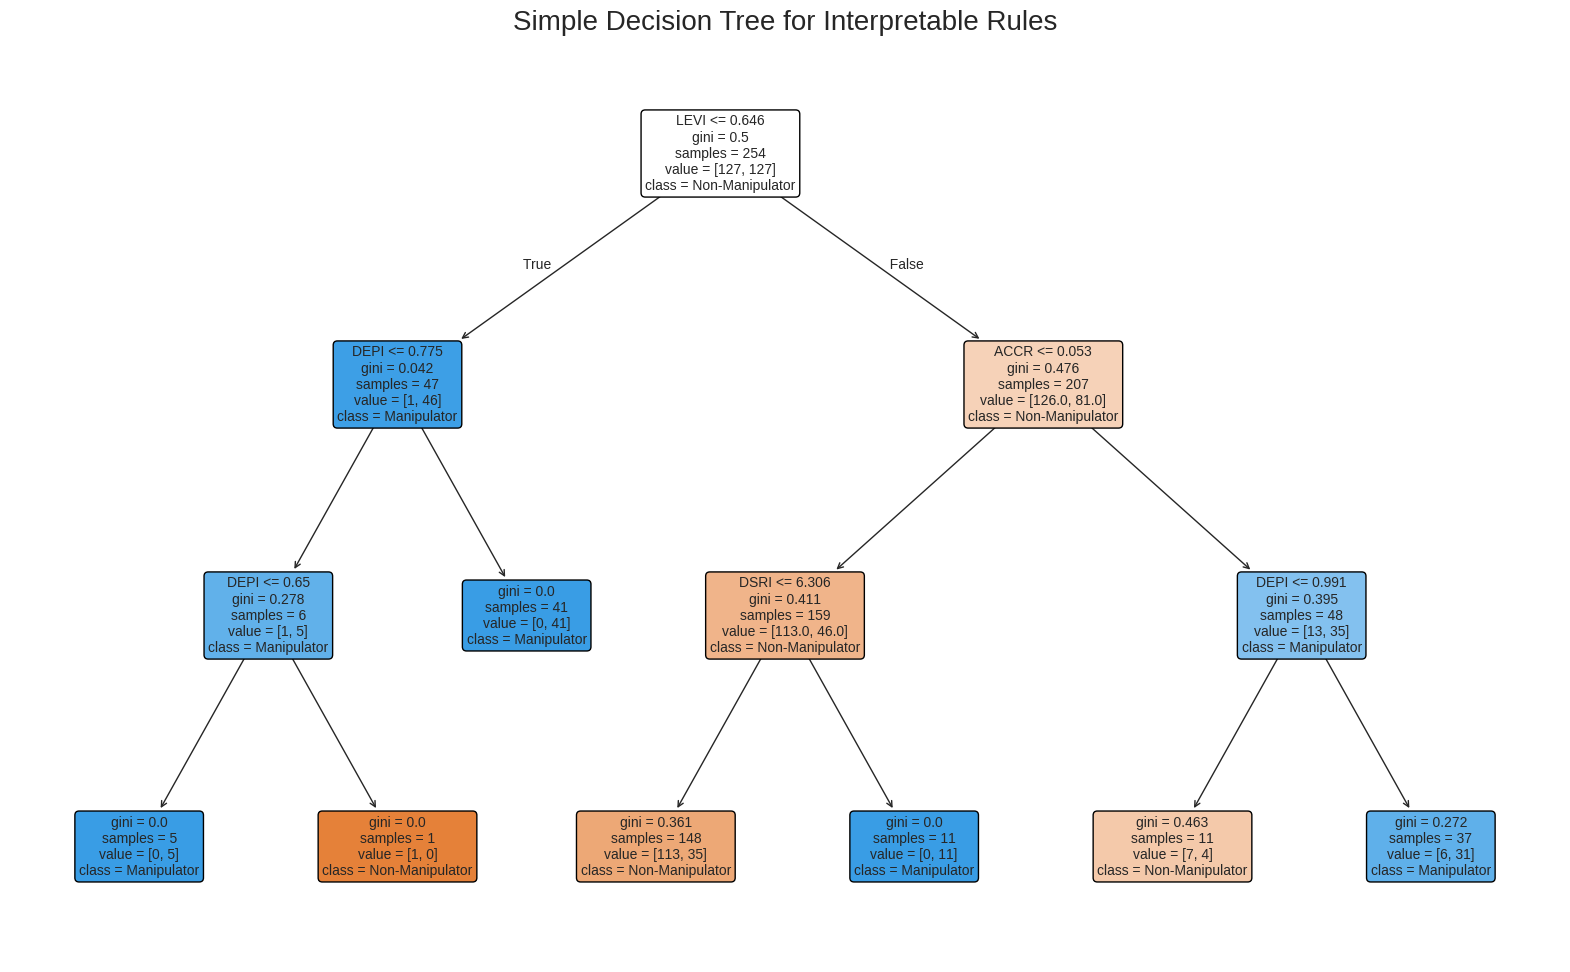


--- Extracted Decision Rules ---
|--- LEVI <= 0.65
|   |--- DEPI <= 0.78
|   |   |--- DEPI <= 0.65
|   |   |   |--- class: 1
|   |   |--- DEPI >  0.65
|   |   |   |--- class: 0
|   |--- DEPI >  0.78
|   |   |--- class: 1
|--- LEVI >  0.65
|   |--- ACCR <= 0.05
|   |   |--- DSRI <= 6.31
|   |   |   |--- class: 0
|   |   |--- DSRI >  6.31
|   |   |   |--- class: 1
|   |--- ACCR >  0.05
|   |   |--- DEPI <= 0.99
|   |   |   |--- class: 0
|   |   |--- DEPI >  0.99
|   |   |   |--- class: 1


--- Interpreted Rules for Auditors ---
- LEVI: High leverage signals financial pressure → higher fraud risk.
- DEPI: Slower depreciation artificially boosts earnings.
- DEPI: Slower depreciation artificially boosts earnings.
- ACCR: High accruals are a classic red flag for manipulation.
- DSRI: Rising receivables vs sales may indicate inflated revenue.
- DEPI: Slower depreciation artificially boosts earnings.

Insight: This shallow tree does not replace the Random Forest but complements it by providin

In [ ]:
# =============================================================================
# STEP 11: DERIVING AN INTERPRETABLE RULE-BASED MODEL
# =============================================================================
print("\nCreating a simple decision tree to extract interpretable rules...")

from sklearn.tree import plot_tree, export_text, DecisionTreeClassifier

# --- 11.1 Train a Simple, Shallow Decision Tree ---
# Depth limited to 3 for interpretability
simple_tree = DecisionTreeClassifier(max_depth=3, random_state=42)
simple_tree.fit(X_train_smote, y_train_smote)

# --- 11.2 Visualize the Decision Tree ---
plt.figure(figsize=(20, 12))
plot_tree(
    simple_tree,
    feature_names=X_train_smote.columns,
    class_names=['Non-Manipulator', 'Manipulator'],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Simple Decision Tree for Interpretable Rules", fontsize=20)
plt.show()

# --- 11.3 Extract Rules Dynamically ---
rules = export_text(simple_tree, feature_names=list(X_train_smote.columns))
print("\n--- Extracted Decision Rules ---")
print(rules)

# --- 11.4 Auditor-Friendly Interpretations ---
print("\n--- Interpreted Rules for Auditors ---")

feature_explanations = {
    "DSRI": "Rising receivables vs sales may indicate inflated revenue.",
    "GMI": "Deteriorating gross margins suggest manipulation in COGS or sales.",
    "AQI": "High AQI implies costs may be improperly capitalized.",
    "SGI": "Rapid sales growth can pressure firms to manipulate earnings.",
    "DEPI": "Slower depreciation artificially boosts earnings.",
    "SGAI": "Sudden SG&A changes may reflect deferred costs.",
    "ACCR": "High accruals are a classic red flag for manipulation.",
    "LEVI": "High leverage signals financial pressure → higher fraud risk."
}

important_features = simple_tree.tree_.feature
for i in range(len(important_features)):
    if important_features[i] != -2:  # -2 means leaf node
        feature = X_train_smote.columns[important_features[i]]
        print(f"- {feature}: {feature_explanations.get(feature, 'Potential manipulation risk detected.')}")

print("\nInsight: This shallow tree does not replace the Random Forest but complements it by providing easy-to-understand rules.")
print("MCA Technologies can use these rules to train auditors and explain model outputs to regulators and clients.")
print("\n--- Rule-Based Model Complete ---")
